# Actividad de clase
### Ana Sofía Hinojosa Bale

In [1]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


1. Se importa fetch_lfw_people de los datasets de scikit-learn.
2. Se asignan los datos a la variable "faces".
3. Se muestran los nombresy las formas de las imagenes.

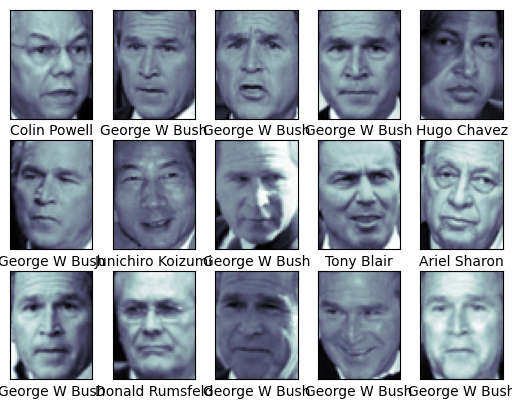

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

1. Se importa el módulo de matplolib.pyplot para poder graficar.
2. Se crea una figura para que haya 15 subgráficos.
3. Se aplana la matriz de ejes de (3, 5) a 15.
4. Se muestran las imagenes del conjunto faces.images.
5. Se quitan las marcas de los ejes para que solo se vean las imagenes y los nombres.

In [3]:

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

1. Se importa support vector classifier de scikit-learn.
2. Se importa Principal Component Analysis y make pipeline.
3. Se hace que cada imagen tenga 150 componentes o características principales, estos se normalizan para que tengan varianza igual a 1 y se fija una semilla para que los resultados se puedan replicar.
4. Se crea una SVM con kernel RBF y se hace que el peso de las clases en la función se ajusten automáticamente.
5. Se unen los pasos anteriores en una función de pipeline para que primero aplique pca y luego la máquina de soporte vectorial.

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

1. Se importa la función de scikit-learn que divide los datos en train y test.
2. Se dividen los los datos de faces, los datos y el target y se agrega nuevamente una semilla aleatoria.

In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 6.51 s, sys: 725 ms, total: 7.24 s
Wall time: 6.74 s
{'svc__C': 5, 'svc__gamma': 0.001}


1. Se importa Grid Search CV de scikit-learn para poder hacer una búsquedda de hiperparámetros por grid junto con cross validation.
2. Se define el conjunto de valores posibles para los hiperparámetros del modelo, con el grado de penalización de errores y la influencia de cada muestra en el kernel RBF.
3. Se crea un objeto que toma el pipeline como base para que pruebe todas las combinaciones posibles de los valores definidos en param_grid.
4. Se entrena el modelo para cada combinación de parámetros. 
5. Se muestran los mejores hiperparámetros encontrados.

In [6]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

1. Se asigna el modelo óptimo a la variable "model".
2. Se utiliza dicho modelo para predecir con las imagenes de prueba encontradas en "Xtest".

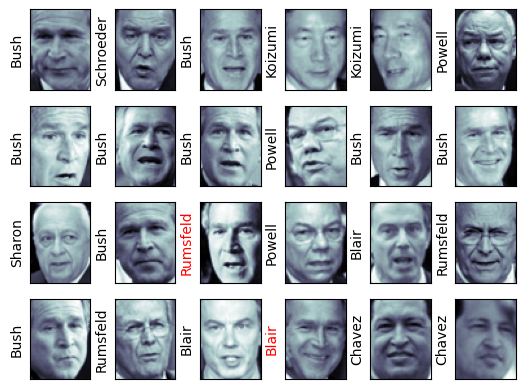

In [7]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

1. Se crea una fihura de 4 filas y 6 columnas para poder tener 24 subgráficos.
2. Se aplana dicha matriz para poder usarla para iterar después.
3. Se representan las imágenes en la iteración para mostrar las 24. 
4. Se eliminan las marcas de los ejes.
5. Se establece una etiqueta al lado de cada imagen, en el eje y y toma solamente el úlrimo nombre o apellido.
6. Se colorea el nombre de la persona de la immagen de negro si se predijo bien y de rojo si se equivocó.

In [8]:

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



1. Se comparan las respuestas verdaderas con las predichas y se asignan los nombres para que estos salgan en lugar de los números de clase.
2. Se muestra el reporte donde dice el nombre y cuanto se tiene en cada métrica.

<Axes: >

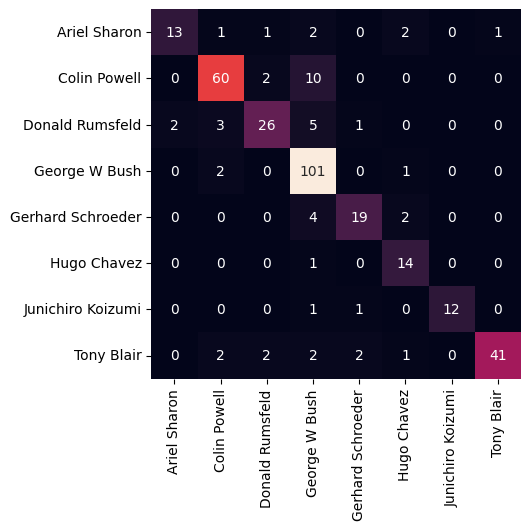

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

1. Se crea una matriz de confusión para mostrar las respuestas verdaderas contra las predichas.
2. Se muestra la cantidad de veces en que a cada persona se le asignó cada una de las otras personas.

In [10]:
from sklearn import datasets
digits = datasets.load_digits()

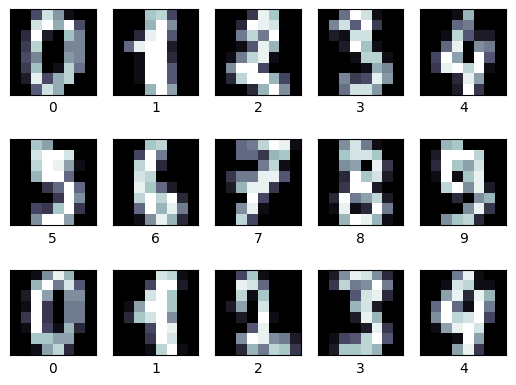

In [11]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])

In [12]:
pca = RandomizedPCA(n_components=64, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3.92 s, sys: 38 ms, total: 3.96 s
Wall time: 3.98 s
{'svc__C': 50, 'svc__gamma': 0.0001}


In [15]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

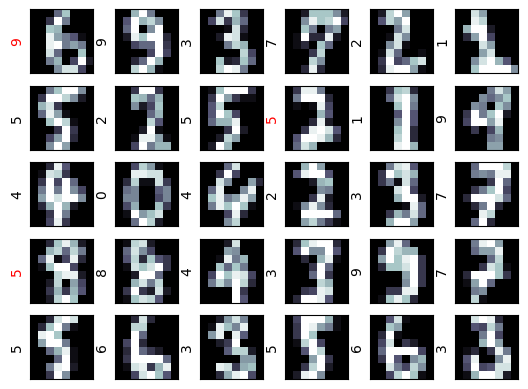

In [16]:
fig, ax = plt.subplots(5, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(8, 8), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(digits['target_names'][yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [17]:
target_names = [str(x) for x in digits['target_names']]
print(classification_report(ytest, yfit, target_names=target_names))


              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.70      0.84      0.77        37
           2       0.81      0.76      0.78        38
           3       0.82      0.80      0.81        46
           4       0.94      0.84      0.88        55
           5       0.82      0.86      0.84        59
           6       0.91      0.96      0.93        45
           7       0.83      0.83      0.83        41
           8       0.79      0.68      0.73        38
           9       0.83      0.83      0.83        48

    accuracy                           0.84       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.84      0.84      0.84       450



<Axes: >

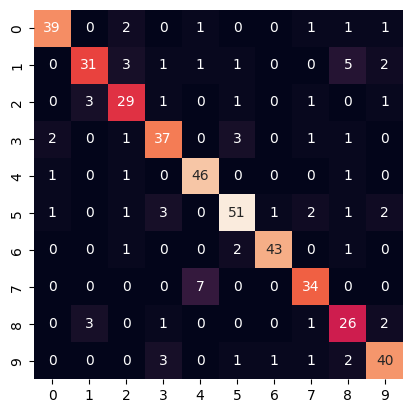

In [18]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits['target_names'],
            yticklabels=digits['target_names'])